## Taller: Creación de dashboards interactivos con Streamlit

### HackCIMAT 2023 - Zacatecas
-----

*Por: Missael Barco*

[Support Vector Machines video](https://youtu.be/_YPScrckx28)
[Streamlit Website](https://streamlit.io/)

### DESCRIPCIÓN
En este taller, aprenderás a utilizar Streamlit, el cual te permite crear aplicaciones web interactivas con unas pocas líneas de código, lo que te permitirá concentrarte en otros ámbitos de tu proyecto. Durante el taller, crearemos una aplicación web interactiva para visualización y análisis de datos de un dataset de ejemplo. Lo aprendido en este taller te servirá para crear un MVP (minimum viable product) de tu proyecto sin preocuparte por construir todo desde cero.

### REQUERIMIENTOS
- Conocimiento de Python (3.0 o superior).
- Pip o conda para manejo de ambientes virtuales.
- Terminal (Bash en WSL, o alguna distribución de Linux).
- Conocimiento de NumPy y Matplotlib es útil, pero no indispensable.
- Cuenta de GitHub. Conocimiento básico de Git es útil.

### Descripción del notebook

En este notebook, creamos un modelo de clasificación de dígitos manuscritos utilizando Support Vector Machines (SVM). El modelo se entrena con el UCI ML hand-written digits. Logramos mas de un 95% de precisión en el conjunto de prueba, y al final probamos con nuestros propios dígitos generados en paint.

In [2]:
# Importamos las librerias necesarias

import numpy as np # linear algebra
import matplotlib.pyplot as plt # for plotting
from sklearn import datasets, svm, metrics # for machine learning
from sklearn.model_selection import train_test_split # for splitting data
import seaborn as sns # for plotting
from skimage.transform import resize # for resizing images

# Estilo de las gráficas
sns.set_theme()

In [6]:
# Cargamos los datos
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


En la siguiente figura, podemos ver un ejemplo de cada uno de los dígitos posibles en el dataset.

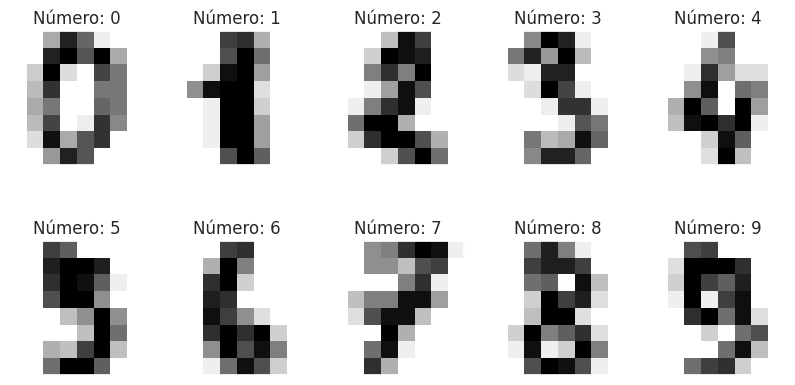

In [7]:
ax, fig = plt.subplots(2, 5, figsize = (10, 5))

for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    ax.imshow(digits.images[i], cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Número: {}'.format(digits.target[i]))

    # Remove ticks from the plot
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Creamos una función para visualizar un digito en particular tomado de manera aleatoria del dataset.

In [8]:
# Function to show random example of a given digit
def show_digit(digit):

    # Get indexes of all examples of given digit
    idx = np.where(digits.target == digit)[0]

    # Pick a random example
    i = np.random.choice(idx)

    # Return the image and label
    img, label = digits.images[i], digits.target[i]
    ax, fig = plt.subplots(figsize=(3, 3))
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)
    plt.xticks([])
    plt.yticks([])
    plt.show()

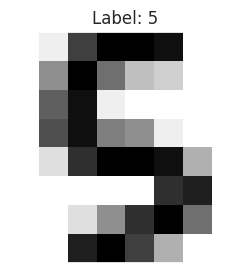

In [11]:
#TODO: Opción de elegir dígito, y opción de refresh

show_digit(5)

Podemos ver, con un histograma, la distribución de los dígitos en el dataset (está balanceado ✨).

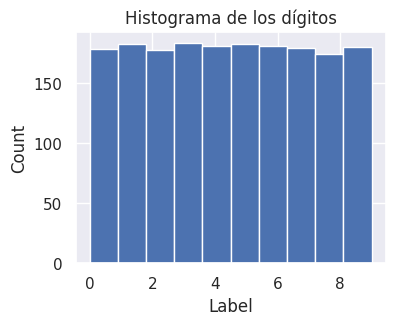

In [10]:
fig, ax = plt.subplots(figsize = (4, 3))
ax.hist(digits.target, bins=10)
ax.set_title('Histograma de los dígitos')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
plt.show()

En el siguiente bloque de código, creamos un modelo de SVM, y lo entrenamos con el dataset.

In [12]:
# Aplanamos las imágenes para que sean un vector de 64 elementos
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Creamos el clasificador
#TODO: Opción de elegir gamma (slider!)
clf = svm.SVC(gamma=0.001)

# Separamos los datos en train y test (65% train, 35% test)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.35, shuffle=False
)

# Entrenamos el clasificador
clf.fit(X_train, y_train)

# Predecimos los valores
predicted = clf.predict(X_test)

In [14]:
# Veamos una de las métricas de evaluación
accu = metrics.accuracy_score(y_test, predicted)
print('Accuracy: %f' % accu)

Accuracy: 0.963434


Podemos visualizar mas detalles del performance con una matriz de confusión.

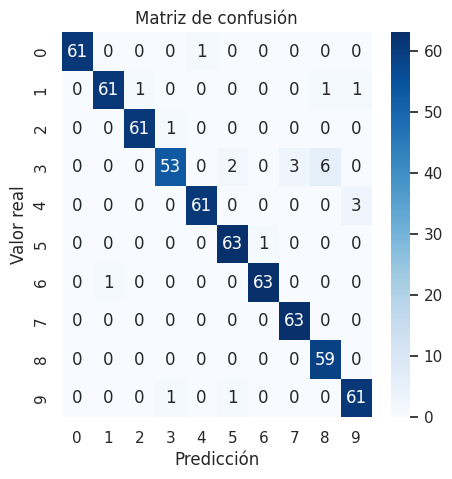

In [15]:
 # Confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title('Matriz de confusión')
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor real')
plt.show()

Ahora, entendamos un poco mas de los posibles valores en cada pixel de la imagen

In [16]:
# Pixel values range
print('Min: %i, Max: %i' % (digits.data.min(), digits.data.max()))

# Set of values for each pixel
print('Unique values: %s' % np.unique(digits.data))

Min: 0, Max: 16
Unique values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


Instrucciones para genera tu propios dígitos:
1. Abre paint
2. Crea una imagen de 64x64 pixeles
3. Selecciona un pincel (brush) de 8px de ancho
4. Dibuja un digito en el centro de la imagen
5. Guarda la imagen como un archivo .jpg


Con esto en mente, creamos una función que nos permita cargar una imagen con estas características, y adaptarla para que pueda ser procesada por el modelo.

In [21]:
def adapt_image(img):
    img_resize = resize(img, (8, 8))

    # Convert to grayscale
    img_resize = np.mean(img_resize, axis=2)

    # Invert colors
    img_resize = 1 - img_resize

    # Scale to 0-16
    img_resize = img_resize * 16

    # Round to nearest integer
    img_resize = np.round(img_resize)

    return img_resize

La siguiente función nos permite visualizar la imagen que acabamos de cargar, y la imagen procesada para ser utilizada por el modelo.

In [22]:
def show_resize(path):
    # Load custom image
    img = plt.imread(path)

    img_resize = adapt_image(img)

    # Show resized and original image
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax[0].set_title('Original')
    ax[1].imshow(img_resize, cmap=plt.cm.gray_r, interpolation='nearest')
    ax[1].set_title('Resized')

    # Remove ticks from the plot
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    ax[1].set_xticks([])
    ax[1].set_yticks([])

    plt.show()

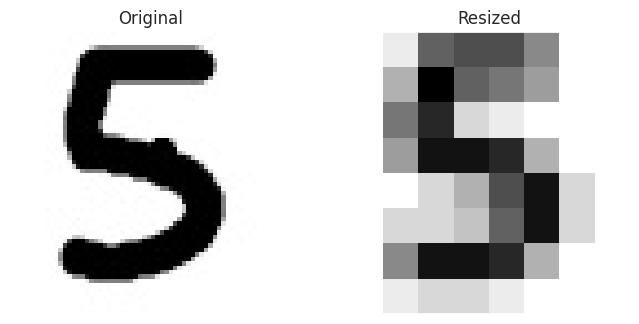

In [23]:
show_resize('examples/5.jpg')

Finalmente, una función para predecir el digito en la imagen cargada.

In [26]:
def predict_digit(path, show = True):
    # Load custom image
    img = plt.imread(path)

    img_resize = adapt_image(img)

    # Flatten image
    img_resize = img_resize.reshape(1, -1)

    # Predict digit
    pred = clf.predict(img_resize)
    print('Predicción: %i' % pred[0])

    if show:
        show_resize(path)

Predicción: 5


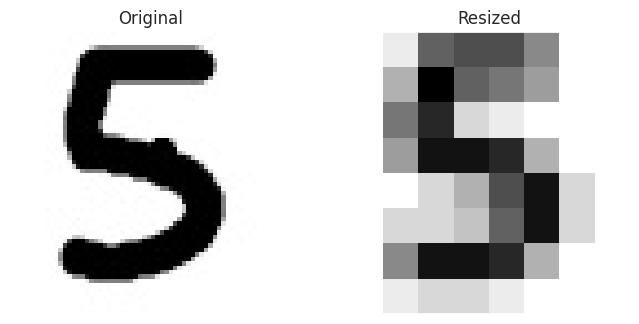

In [27]:
predict_digit('examples/5.jpg')

### Bonus: Reducción de dimensionalidad con PCA

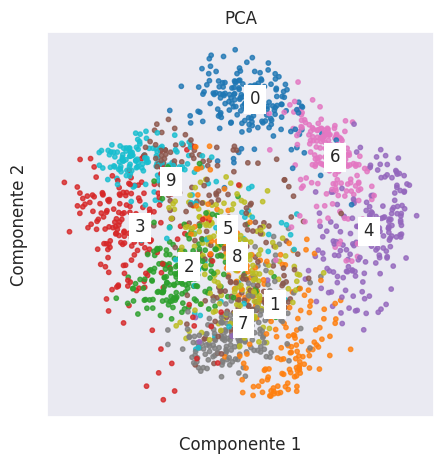

In [28]:
# PCA of the data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data)

# Transform the data
data_pca = pca.transform(data)

# Plot the results
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(data_pca[:, 0], data_pca[:, 1],
        c=digits.target, cmap='tab10', alpha = 0.8, s = 10)
ax.set_title('PCA')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')

# Add labels to the plot
for i in range(10):
        ax.text(data_pca[digits.target == i, 0].mean(),
                data_pca[digits.target == i, 1].mean(), str(i),
                bbox=dict(facecolor='white', alpha=1, edgecolor='none', pad=4))

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.grid(False)
plt.show()